## Lib imports

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
import seaborn as sns
import scipy.stats as sts
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedKFold 
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from collections import Counter
import copy
from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
import sklearn.metrics as me
# from sklearn import linear_model
# from sklearn.metrics import classification_report
import pingouin as pg
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import mean_absolute_error

## Files reading

In [3]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py' --all_tweets True

Starting script...
Removing existing file...
Ending script...


In [4]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383,119897261
participant_id,1,2,3,None,4,5,6,None,7,8,None,9,10,11,12,13,14,15,16
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways,Willian Justen
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways,Willian_justen
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba,"Petrópolis, Brasil"


In [5]:
def create_tweets_df_per_user(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    tweets_pd.columns = ['id', 'id_str_twitter', "text", "created_at", 'favorite_count', 'retweet_count',
                         'lang',
                         "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "vader_sentiment_analysis_polarity_5_cat",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_polarity_5_cat",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_polarity_5_cat",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_polarity_5_cat",
                         "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                         "liwc_sentiment_analysis_polarity_5_cat",
                         "final_score", "final_score_ensemble", 
                         "final_polarity", "final_polarity_ensemble", 
                         'text_updated', 'is_retweet', 'retweet_updated']
 
    return tweets_pd

In [6]:
all_tweets = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets = create_tweets_df_per_user(data, id_user)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang',
                             #"vader_sentiment_analysis_score", 
                             "vader_sentiment_analysis_polarity",
                             "vader_sentiment_analysis_polarity_5_cat",
                             #"oplexicon_sentiment_analysis_score",
                             "oplexicon_sentiment_analysis_polarity",
                             "oplexicon_sentiment_analysis_polarity_5_cat",
                             #"sentistrength_sentiment_analysis_score",
                             "sentistrength_sentiment_analysis_polarity",
                             "sentistrength_sentiment_analysis_polarity_5_cat",
                             #"sentilexpt_sentiment_analysis_score",
                             "sentilexpt_sentiment_analysis_polarity",
                             "sentilexpt_sentiment_analysis_polarity_5_cat",
                             #"liwc_sentiment_analysis_score",
                             "liwc_sentiment_analysis_polarity",
                             "liwc_sentiment_analysis_polarity_5_cat",
                             'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]

        tweets['Participant'] = data[id_user]['participant_id']
        if all_tweets.empty:
            all_tweets = tweets
        else:
            all_tweets = all_tweets.append(tweets)

In [7]:
all_tweets.head()

,created_at,id_user,vader_sentiment_analysis_score,oplexicon_sentiment_analysis_score,sentistrength_sentiment_analysis_score,sentilexpt_sentiment_analysis_score,liwc_sentiment_analysis_score,final_score,final_score_ensemble,final_polarity,final_polarity_ensemble,Participant
0,2021-03-31T19:13:28,26,-0.4588,0.000000,0.00,0.00,0.0000,-0.091760,0.000,neg,neu,1
1,2021-03-31T12:28:56,26,0.0000,0.000000,0.00,0.00,-0.0667,-0.013340,0.000,neg,neu,1
2,2021-03-31T12:17:06,26,0.7734,0.458831,0.00,0.00,0.0196,0.250366,0.000,pos,neu,1
3,2021-03-31T11:46:04,26,-0.8720,0.458831,0.25,-0.25,0.0400,-0.074634,0.000,neg,neu,1
4,2021-03-30T17:58:24,26,-0.6808,0.000000,0.00,-0.25,0.0000,-0.186160,-0.125,neg,neg,1


In [8]:
count = 1
json_data = {
    'Participant': [],
    'Id User': [],
    'O': [],
    'C': [],
    'E': [],
    'A': [],
    'N': []
}

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'Id User']
        b['Participant'] = count
        del b['id']
        b = b[['Participant', 'Id User', 'O', 'C', 'E', 'A', 'N']]
        json_data['Participant'].append(b['Participant'][0])
        json_data['Id User'].append(b['Id User'][0])
        json_data['O'].append(b['O'][0])
        json_data['C'].append(b['C'][0])
        json_data['E'].append(b['E'][0])
        json_data['A'].append(b['A'][0])
        json_data['N'].append(b['N'][0])
        count += 1
        
bf = pd.DataFrame(json_data)

In [9]:
bf.head()

,Participant,Id User,O,C,E,A,N
0,1,26,37,43,36,24,26
1,2,27,41,43,34,22,23
2,3,28,43,46,31,24,15
3,4,30,17,33,33,22,39
4,5,31,22,33,31,20,8


In [10]:
df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : [],
            'O': [],
            'C': [],
            'E': [],
            'A': [],
            'N': []
          }

df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    vader_df = t[['final_score_ensemble', 'final_polarity_ensemble']].copy()
    qtd_pos = vader_df.query('final_polarity_ensemble == "pos"').count()
    qtd_neu = vader_df.query('final_polarity_ensemble == "neu"').count()
    qtd_neg = vader_df.query('final_polarity_ensemble == "neg"').count()
    qtd_total = vader_df['final_polarity_ensemble'].count()
    df_dict['id_user'].append(bigfive['Id User'].iloc[0])
#     print(type(bigfive['Id User'].iloc[0]))
    df_dict['pos'].append(qtd_pos.iloc[0])
    df_dict['neu'].append(qtd_neu.iloc[0])
    df_dict['neg'].append(qtd_neg.iloc[0])
    df_dict['por_pos'].append(((qtd_pos / qtd_total) * 100).iloc[0])
    df_dict['por_neu'].append(((qtd_neu / qtd_total) * 100).iloc[0])
    df_dict['por_neg'].append(((qtd_neg / qtd_total) * 100).iloc[0])
    df_dict['mean'].append(vader_df['final_score_ensemble'].mean())

    df_dict['O'].append(bigfive['O'].iloc[0])
    df_dict['C'].append(bigfive['C'].iloc[0])
    df_dict['E'].append(bigfive['E'].iloc[0])
    df_dict['A'].append(bigfive['A'].iloc[0])
    df_dict['N'].append(bigfive['N'].iloc[0])

df = pd.DataFrame(df_dict)

biglist = ['O', 'C', 'E', 'A', 'N']
for b in biglist:
    res = []
    for r in df[b]:
        if r <= 10:
            res.append(1)
        elif r > 10 and r < 21:
            res.append(2)
        elif r > 20 and r < 31:
            res.append(3)
        elif r > 30 and r < 41:
            res.append(4)
        elif r > 40:
            res.append(5)

    df['{}_Coded'.format(b)] = res
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,36,24,26,4,5,4,3,3
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,34,22,23,5,5,4,3,3
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,31,24,15,5,5,4,3,2
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,33,22,39,2,4,4,3,4
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,31,20,8,3,4,4,2,1
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,39,28,15,4,5,4,3,2
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,32,26,16,4,4,4,3,2
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,34,35,29,3,5,4,4,3
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,38,22,21,4,5,4,3,3
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,19,18,28,4,5,2,2,3


In [255]:
df['more_positive'] = [0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1]

In [256]:
df['more_negative'] = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]

In [257]:
df['more_neutral'] = [1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,0]

In [261]:
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,...,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded,more_positive,more_negative,more_neutral
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,...,24,26,4,5,4,3,3,0,0,1
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,...,22,23,5,5,4,3,3,0,0,1
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,...,24,15,5,5,4,3,2,0,0,1
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,...,22,39,2,4,4,3,4,1,0,0
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,...,20,8,3,4,4,2,1,1,0,0
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,...,28,15,4,5,4,3,2,1,0,0
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,...,26,16,4,4,4,3,2,1,0,0
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,...,35,29,3,5,4,4,3,0,0,1
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,...,22,21,4,5,4,3,3,1,0,0
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,...,18,28,4,5,2,2,3,0,1,0


# LOGISTIC REGRESSION

In [342]:
columns_features = ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
X = df[columns_features]
X

,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,4,5,4,3,3
1,5,5,4,3,3
2,5,5,4,3,2
3,2,4,4,3,4
4,3,4,4,2,1
5,4,5,4,3,2
6,4,4,4,3,2
7,3,5,4,4,3
8,4,5,4,3,3
9,4,5,2,2,3


In [193]:
# y = df[['mean_positive']]
# y

In [154]:
# Cria um conjunto de hiperparametros a serem testados
# param_grid = {'C': np.logspace(-5, 8, 15)}
# param_grid = {'C': 1.0, 'penalty': None}

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# instancia o classificador com nome logreg
logreg = LogisticRegression()

In [108]:
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [109]:
# treina o modelo
logreg_cv.fit(X_train, y_train)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [110]:
# Verifica os melhores parametros e melhor acuracia
print("Parametros: {}".format(logreg_cv.best_params_))
print("Acuracia: {}".format(logreg_cv.best_score_))
print("Estimator: {}".format(logreg_cv.best_estimator_))

Parametros: {'C': 31.622776601683793}
Acuracia: 0.8333333333333333
Estimator: LogisticRegression(C=31.622776601683793)


In [111]:
# faz predicao e salva em y_pred
y_pred = logreg_cv.predict(X_test)

In [113]:
# acuracia
logreg_cv.score(X_test, y_test)

# matriz de confusao
print(confusion_matrix(y_test, y_pred))

# outras metricas
print(classification_report(y_test, y_pred))

[[0 1]
 [2 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



# KFOLD

In [277]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [278]:
y_p = df[['more_positive']]

In [279]:
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y_p, r)
    # summarize
    print('>%d Accuracy=%.4f std=%.3f' % (r, np.mean(scores), np.std(scores)))
    # store
    results.append(scores)

# print('Accuracy: %.4f (%.4f)' % (np.mean(results), np.std(results)))
#     results

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [268]:
y_n = df[['more_negative']]

In [269]:
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y_n, r)
    # summarize
    print('>%d Accuracy=%.4f std=%.3f' % (r, np.mean(scores), np.std(scores)))
    # store
    results.append(scores)

# print('Accuracy: %.4f (%.4f)' % (np.mean(results), np.std(results)))
#     results

>1 Accuracy=nan std=nan
>2 Accuracy=nan std=nan
>3 Accuracy=nan std=nan
>4 Accuracy=nan std=nan
>5 Accuracy=nan std=nan
>6 Accuracy=nan std=nan
>7 Accuracy=nan std=nan
>8 Accuracy=nan std=nan
>9 Accuracy=nan std=nan
>10 Accuracy=nan std=nan
>11 Accuracy=nan std=nan
>12 Accuracy=nan std=nan
>13 Accuracy=nan std=nan
>14 Accuracy=nan std=nan
>15 Accuracy=nan std=nan


In [266]:
y_neu = df[['more_neutral']]

In [267]:
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y_neu, r)
    # summarize
    print('>%d Accuracy=%.4f std=%.3f' % (r, np.mean(scores), np.std(scores)))
    # store
    results.append(scores)

# print('Accuracy: %.4f (%.4f)' % (np.mean(results), np.std(results)))
#     results

>1 Accuracy=0.5500 std=0.415
>2 Accuracy=0.5750 std=0.426
>3 Accuracy=0.5833 std=0.430
>4 Accuracy=0.5750 std=0.412
>5 Accuracy=0.5700 std=0.400
>6 Accuracy=0.6000 std=0.396
>7 Accuracy=0.5857 std=0.396
>8 Accuracy=0.6000 std=0.391
>9 Accuracy=0.6000 std=0.396
>10 Accuracy=0.6000 std=0.400
>11 Accuracy=0.5955 std=0.396
>12 Accuracy=0.5917 std=0.398
>13 Accuracy=0.5885 std=0.399
>14 Accuracy=0.5964 std=0.396
>15 Accuracy=0.6000 std=0.396


In [205]:
# print(me.SCORERS.keys())
cv = RepeatedKFold(n_splits=5, n_repeats=100, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# scores
# report performance
print('Accuracy: %.4f (%.4f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.5825 (0.2920)


In [271]:
predicted = cross_val_predict(LogisticRegression(), X, y_p, cv=5)
print(accuracy_score(y_p, predicted))
print(classification_report(y_p, predicted))

0.75
              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.43      0.60         7

    accuracy                           0.75        16
   macro avg       0.85      0.71      0.71        16
weighted avg       0.83      0.75      0.72        16



/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [272]:
predicted = cross_val_predict(LogisticRegression(), X, y_n, cv=5)
print(accuracy_score(y_n, predicted))
print(classification_report(y_n, predicted))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

-------------------------------
----- LOGISTIC REGRESSION -----
-------------------------------

Dep.: Positive Tweets (%)
Ind.: O_Coded, C_Coded, E_Coded, A_Coded, N_Coded

-------------------------------
  Attribute  Importance
2   E_Coded    0.534393
0   O_Coded   -0.395739
3   A_Coded   -0.540054
4   N_Coded   -0.569557
1   C_Coded   -2.458241
              precision    recall  f1-score   support

           0     0.8182    1.0000    0.9000         9
           1     1.0000    0.7143    0.8333         7

    accuracy                         0.8750        16
   macro avg     0.9091    0.8571    0.8667        16
weighted avg     0.8977    0.8750    0.8708        16



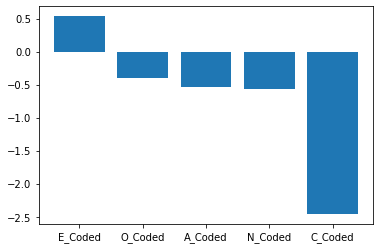

In [310]:
print('-------------------------------')
print('----- LOGISTIC REGRESSION -----')
print('-------------------------------')
print()
print('Dep.: Positive Tweets (%)')
print('Ind.: O_Coded, C_Coded, E_Coded, A_Coded, N_Coded')
print()
print('-------------------------------')

clf = LogisticRegressionCV(cv=5, random_state=42).fit(X, y_p.values.ravel())
predicted = clf.predict(X)

importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': clf.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

print(classification_report(y_p, predicted, digits=4))

# plot feature importance
plt.bar(importances['Attribute'], importances['Importance'])
plt.show()

-------------------------------
----- LOGISTIC REGRESSION -----
-------------------------------

Dep.: Negative Tweets (%)
Ind.: O_Coded, C_Coded, E_Coded, A_Coded, N_Coded

-------------------------------
  Attribute  Importance
0   O_Coded    0.000037
1   C_Coded    0.000031
4   N_Coded    0.000012
3   A_Coded   -0.000100
2   E_Coded   -0.000162
              precision    recall  f1-score   support

           0     0.9375    1.0000    0.9677        15
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9375        16
   macro avg     0.4688    0.5000    0.4839        16
weighted avg     0.8789    0.9375    0.9073        16



/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: Un

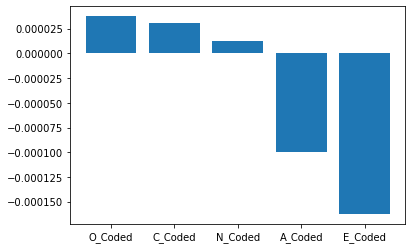

In [311]:
print('-------------------------------')
print('----- LOGISTIC REGRESSION -----')
print('-------------------------------')
print()
print('Dep.: Negative Tweets (%)')
print('Ind.: O_Coded, C_Coded, E_Coded, A_Coded, N_Coded')
print()
print('-------------------------------')

clf = LogisticRegressionCV(cv=5, random_state=42).fit(X, y_n.values.ravel())
predicted = clf.predict(X)

importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': clf.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

print(classification_report(y_n, predicted, digits=4))

# plot feature importance
plt.bar(importances['Attribute'], importances['Importance'])
plt.show()

In [405]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression, SelectKBest

y = y_neu

print('-------------------------------')
print('----- LOGISTIC REGRESSION -----')
print('-------------------------------')

dic = {
    'O_Coded':[],
    'C_Coded':[],
    'E_Coded':[],
    'A_Coded':[],
    'N_Coded':[]
}

# importances = pd.DataFrame(data={
#     'Attribute': X.columns,
#     'Importance': clf.coef_[0]
# })
# importances = importances.sort_values(by='Importance', ascending=False)
# print(importances)

# plot feature importance
# plt.bar(importances['Attribute'], importances['Importance'])
# plt.show()

kf = 3

# configure to select all features
fs = SelectKBest(score_func=f_regression, k=kf)
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
# transform test input data
X_test_fs = fs.transform(X)

# what are scores for the features
for i in range(len(fs.scores_)):
#     print('Feature %d: %f (pvalue %f)' % (i, fs.scores_[i], fs.pvalues_[i]))
    dic[list(dic.keys())[i]] = [fs.scores_[i], fs.pvalues_[i]]
    
scores_list = []
for d in dic:
    scores_list.append(dic[d][0])
    
scores_list = sorted(scores_list, reverse=True)

ind_variables = []

for s in scores_list[:kf]:
    for d in dic:
        dicio = dic[d]
        if s in dicio:
            ind_variables.append(d)
    
variables = ', '.join(ind_variables)

print()
print('Dep.: Neutral Tweets (%)')
print('Fea.: {}'.format(variables))
print()
print('-------------------------------')

clf = LogisticRegressionCV(cv=5, random_state=42).fit(X_train_fs, y.values.ravel())
predicted = clf.predict(X_test_fs)

print(classification_report(y, predicted, digits=4))
mae = mean_absolute_error(y, predicted)
print('MAE: %.4f' % mae)

-------------------------------
----- LOGISTIC REGRESSION -----
-------------------------------

Dep.: Neutral Tweets (%)
Fea.: C_Coded, A_Coded, E_Coded

-------------------------------


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0     1.0000    0.7500    0.8571         8
           1     0.8000    1.0000    0.8889         8

    accuracy                         0.8750        16
   macro avg     0.9000    0.8750    0.8730        16
weighted avg     0.9000    0.8750    0.8730        16

MAE: 0.1250
